In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import copy 
import joblib 
from copy import deepcopy
import missingno as msno
import seaborn as sns 
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-traffic-accidents/RTA Dataset.csv
/kaggle/input/road-traffic-accidents/cleaned.csv


# Classification Task

## Description of Dataset:

This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

## Problem Statement: 
The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be f1-score


In [2]:
rta_dataset = "../input/road-traffic-accidents/RTA Dataset.csv"
rta_dataset 

'../input/road-traffic-accidents/RTA Dataset.csv'

## A. Reading Dataset

In [3]:
rta_data = pd.read_csv(rta_dataset)

# making copies of dataset
rta_data1 = pd.read_csv(rta_dataset)
rta_data2 = pd.read_csv(rta_dataset)
rta_data3 = pd.read_csv(rta_dataset)
rta_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### 2.Shape of Dataset

In [4]:
print(f"{rta_data.shape[0]} instances have been identified and {rta_data.shape[1]} have featured")

12316 instances have been identified and 32 have featured


## B. Exploratory Data Analysis(EDA)

### 1. Columns of Dataset

In [5]:
rta_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
# Information about Columns
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
# Summarized statistics of columns
rta_data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


#### Observations:

* We can observe, only two columns are described that are numerical(so, categorical columns are not considered).
* A total of 12316 (count) have been identified which are the instances/rows of our dataset.
* The range of both columns seems to be same.


In [8]:
# Variation of Numerical and categorical Columns.

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features=[rta_data.select_dtypes(include=numerics).columns]
print(numeric_features)

[Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')]


* Two columns are numerical and rest are all categorical.

#### 2. Missing Values of dataset.

In [9]:
rta_data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

#### observations:

* We can observe few columns has missing values as they have count more than 0.

In [10]:
# print only null valued columns

index = len(rta_data.columns[rta_data.isnull().sum()>0])

def nullValued(df):
    data = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in df.columns:
        missingCount = df[col].isnull().sum()
        if missingCount>0:
            data=data.append({'Col':col,'Count':missingCount,'Percent':(100*missingCount)/12316},ignore_index=True)

    return data.sort_values(by=['Count'])
    
nullValued(rta_data)

,Col,Count,Percent
9,Road_allignment,142,1.152972
12,Type_of_collision,155,1.258525
11,Road_surface_type,172,1.396557
7,Area_accident_occured,239,1.940565
13,Vehicle_movement,308,2.500812
8,Lanes_or_Medians,385,3.126015
4,Owner_of_vehicle,482,3.913608
1,Vehicle_driver_relation,579,4.701202
0,Educational_level,741,6.016564
2,Driving_experience,829,6.731082


#### Observations:

* Here, We can observe the dataframe displays the count and percent of null values of that columns.
* We will deal with it later after visualizations.

In [11]:
# print duplicates
print("Number of duplicates: ", rta_data.duplicated().sum())
print("Unique values per column:")
rta_data.nunique()

Number of duplicates:  0
Unique values per column:


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

### C. Visualizations

In [12]:
# Univariate Analysis

In [13]:
rta_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

<AxesSubplot:ylabel='Accident_severity'>

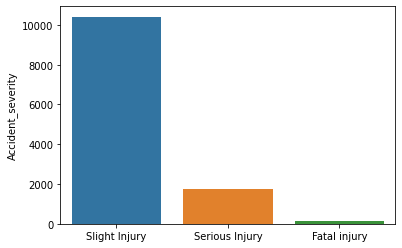

In [14]:
# As our Target Variable is "Accident_severity", we can visualize it first

data = rta_data['Accident_severity'].value_counts()
keys = rta_data['Accident_severity'].unique()
sns.barplot(x = keys, y=data)

#### observations:

1. We have very less instances of fatal Injury, followed by Serious Injury.
2. We have more instances of slight Injury.
3. From this, we can know that 80% of people who are involved in accident, are safe.

In [15]:
## For Visualizations Purpose, we can segregate Time in to Hours, Minutes

rta_data['Time'] = pd.to_datetime(rta_data['Time'])


In [16]:
rta_data['Time']

0       2022-12-03 17:02:00
1       2022-12-03 17:02:00
2       2022-12-03 17:02:00
3       2022-12-03 01:06:00
4       2022-12-03 01:06:00
                ...        
12311   2022-12-03 16:15:00
12312   2022-12-03 18:00:00
12313   2022-12-03 13:55:00
12314   2022-12-03 13:55:00
12315   2022-12-03 13:55:00
Name: Time, Length: 12316, dtype: datetime64[ns]

In [17]:
rta_data['Year'] = rta_data['Time'].dt.year
rta_data['Month'] = rta_data['Time'].dt.month
rta_data['Day'] = rta_data['Time'].dt.day
rta_data['Hour'] = rta_data['Time'].dt.hour
rta_data['Minutes'] = rta_data['Time'].dt.minute
rta_data.drop('Time',axis=1,inplace=True)
rta_data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Year,Month,Day,Hour,Minutes
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,2022,12,3,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,12,3,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,2022,12,3,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,2022,12,3,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2022,12,3,1,6


In [18]:
print('Year:' ,rta_data['Year'].value_counts())
print("Month:" ,rta_data['Month'].value_counts())

Year: 2022    12316
Name: Year, dtype: int64
Month: 12    12316
Name: Month, dtype: int64


#### observations:

* Both Year and Month have only one value as 2022 and 11 (November), we can drop them.


In [19]:
rta_data.drop(['Year','Month'],inplace=True,axis=1)

<AxesSubplot:xlabel='count', ylabel='Minutes'>

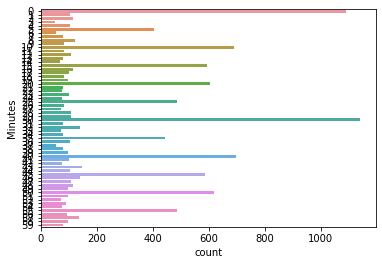

In [20]:
sns.countplot(y ='Minutes', data = rta_data)

<AxesSubplot:>

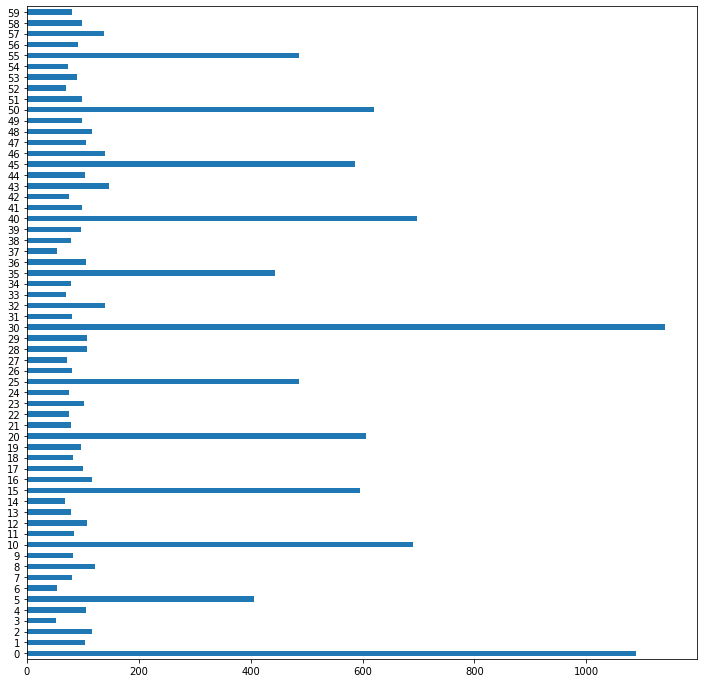

In [21]:
rta_data['Minutes'].value_counts().sort_index().plot(kind='barh', figsize=(12,12))

<AxesSubplot:>

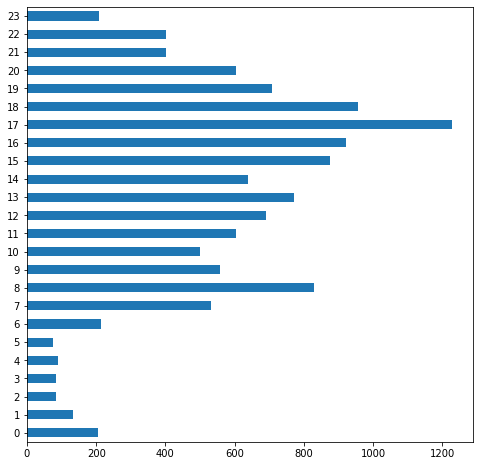

In [22]:
rta_data['Hour'].value_counts().sort_index().plot(kind='barh', figsize=(8,8))

<AxesSubplot:>

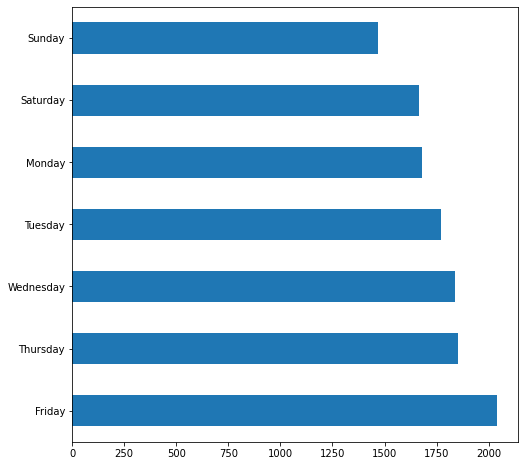

In [23]:
rta_data['Day_of_week'].value_counts().plot(kind='barh', figsize=(8,8))

#### Observations:

1. As From Minutes graph, we can observe at the 30th minutes most accidents happened
followed by starting minute of hour and the data is approximated to every 5 minutes so that it
is easy to obtain conclusion.

2. As From hours graph, Between Morning 8AM to Evening 19(7PM), most of accidents happened,
as that is due to working hours. At 16(4PM) to 19(7PM), majority of accidents happened.

3. From Day graph, Most accidents happened on end of working week Friday.


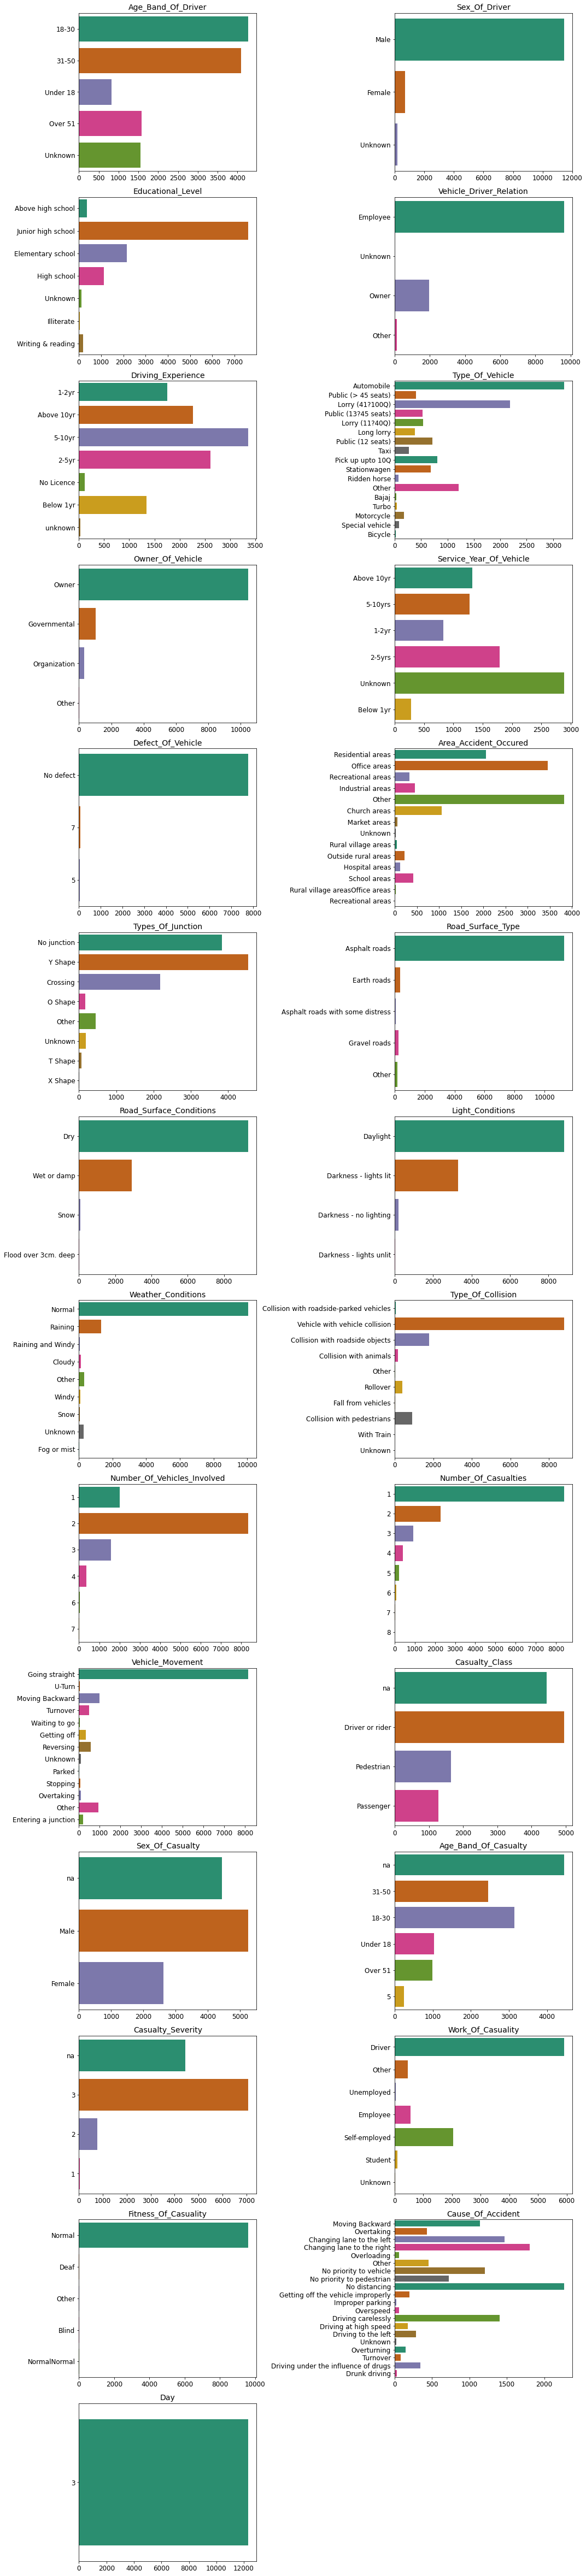

In [24]:
## Plotting Few columns at a time

plt.figure(figsize=(15,70))
plotnumber = 1
df = rta_data
for col in df.drop(['Hour', 'Minutes','Day_of_week', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement','Accident_severity'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(15,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

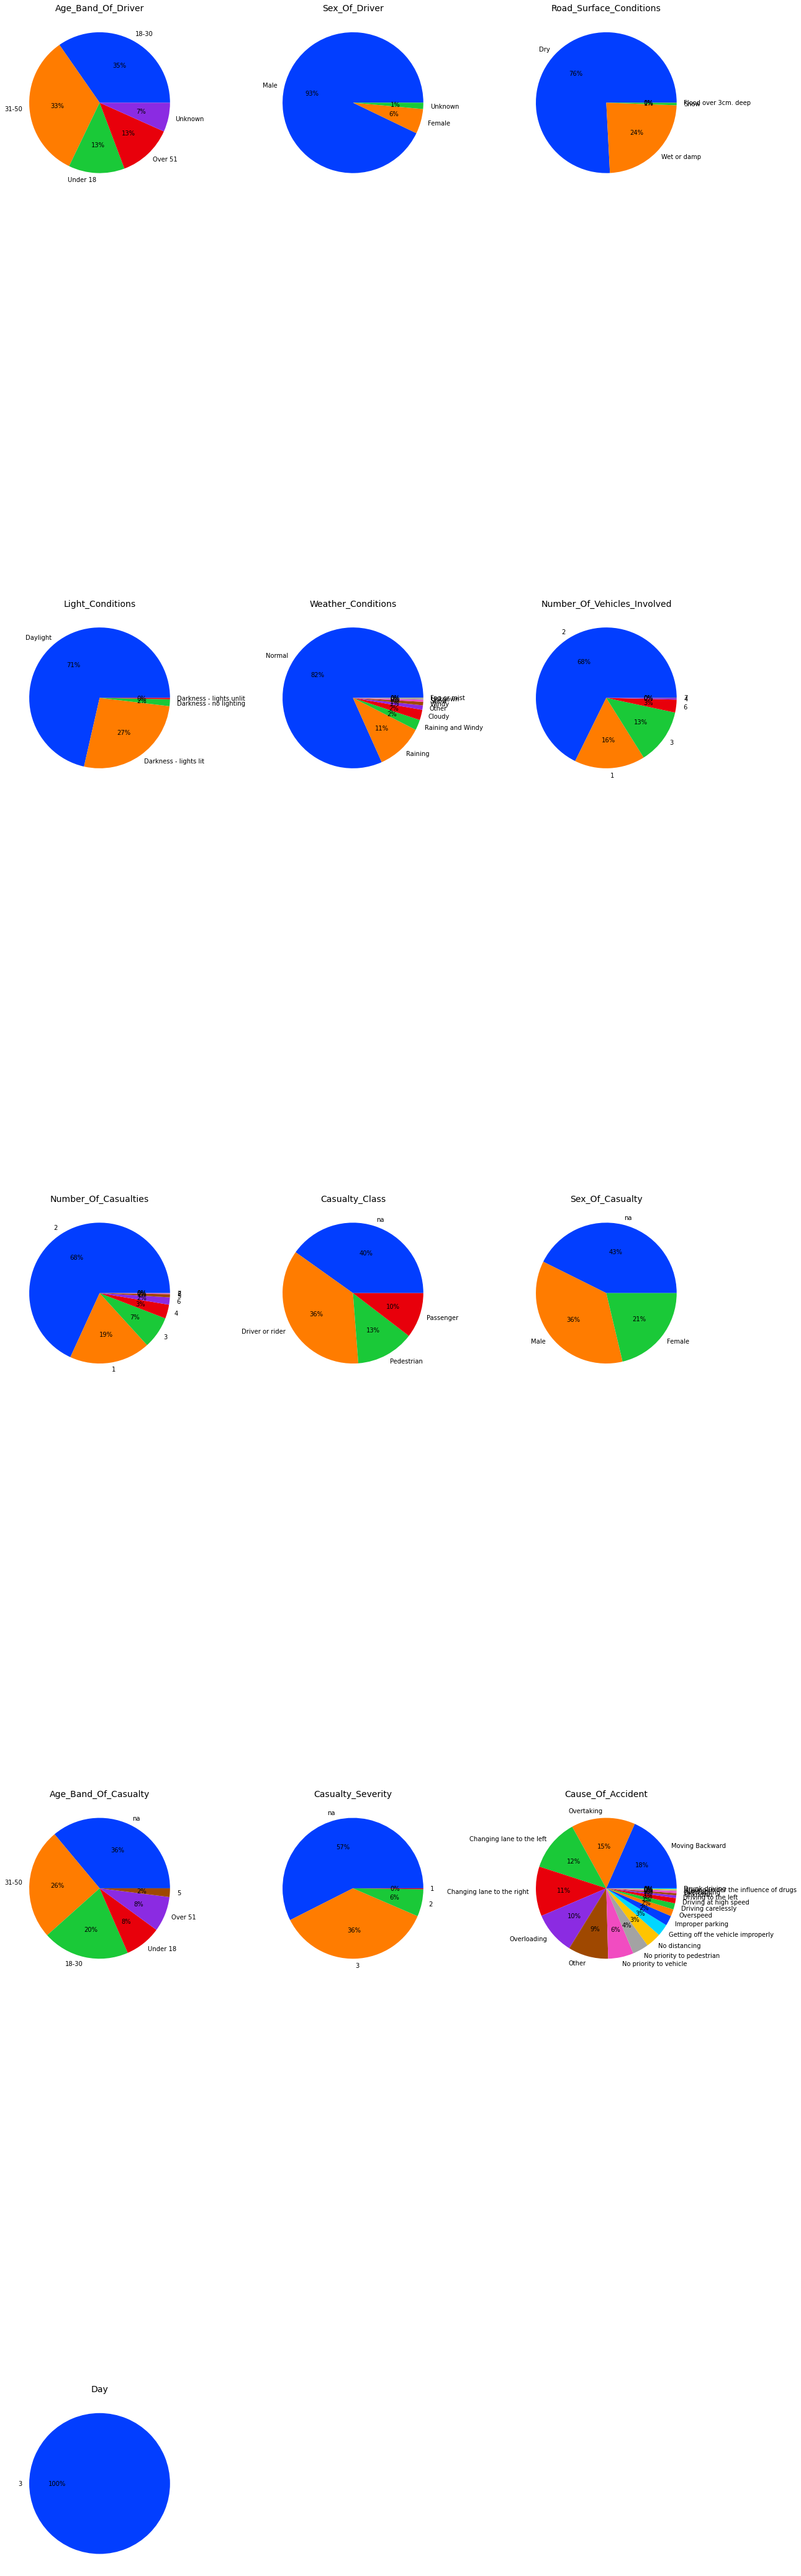

In [25]:
## Plotting Few columns at a time

plt.figure(figsize=(18,80))
plotnumber = 1
df = rta_data
for col in df.drop(['Hour', 'Minutes','Day_of_week', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement','Accident_severity'], axis=1):
    if plotnumber <= df.shape[1]:
        if len(df[col].unique())==len(df[col].value_counts()):
            ax1 = plt.subplot(6,3,plotnumber)
            palette_color = sns.color_palette('bright')
            plt.pie(df[col].value_counts(), labels=df[col].unique(), colors=palette_color, autopct='%.0f%%')
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.title(col.title(), fontsize=14)
            plt.xlabel('')
            plt.ylabel('')
            plotnumber +=1
plt.tight_layout()

# Observations:

1. PieChart seems to be clumsy, so the bar chart can be considered for more clear observations.
2. **Age_Band_Of_Driver:**
   * Majority of accidents happened to people below the age of 50.
   * People with age in between 18 and 30 have been involved in most of accidents, due to rash driving/other vechicle rash driving/pedestrian lazy movements/speed breakers..etc..
   * People with age in between 31-50 is followed by people of 18-30.
   * Under 18 people are less, so the people under the age of 18 didn't involve in accidents much.
3. **Sex_Of_Driver:**
   * 95% of people are males who involved in most of accidents, while women are far less than male.
   * Here, we can observe there is a lot of imbalance between the two classes of (Male,Female).
   * This Column can be dropped of.
4. **Educational_Level**:
   * People with education of "Junior_highSchool" have been in accidents most.
   * Here, too we can observe lot of imbalance from "Junior_highSchool" to the rest except "ElementarySchool".
   * Can be considered for dropping.
5. **Vehicle_Driver_Relation:**
   * 85% of people are employees of vehicle like, they aren't the owners but they are the employees.
   * only few of them are owners who are involved in accidents.The owners seems to be so careful about driving. 
6. **Driving_Experience:**
   * People having good experience(5-10Yr) have been in accidents, followed by people with normal experience(2-5Yr).
   * People with the high experience (10Yr), even though they too are involved much in accidents, but they have been safe with driving compared to experience of (2-10Yr) people.
   * People with no license too are involved in accidents, but they are very less in number.
7. **Type_Of_Vehicle:**
   * Mostly automobiles are involved followed by Lorries.
   * The two-Wheeler vehicles aren't involved much in accidents.
8. **Owner_Of_Vehicle:**
   * Owner of vehicle are involved in accidents much. 
9. **Service_Year_Of_Vehicle:**
   * Good amount of data isn't collected for service year of vehicle.
   * The vehicles with 2-5yrs of service, have been in accidents more compared to other service years.
10. **Defect_Of_Vehicle:**
    * This column can be dropped of as only a constant value is leading the chart.
    * The vehicles involved in accidents have no defect.
11. **Area_accident_Occured:**
    * Most accidents occured in Office areas, residential areas, which meant that the places with most populated area.
    * There are very very less accidents in rural areas.
    * As we can observe, Recreational areas have been repeated twice.
12. **Types_Of_Junction:**
     * Most accidents occured in Y-Junction followed by no junction, that means the junction with turns and u-turns is the most happening place for accidents. 
     * While the pedestrian crossing has also good number of accidents.
13. **Road_Surface_Type:**
     * Most of accidents occured in asphalt road surface.
     * Can be dropped Of.
14. **Light_Conditions:**
     * Most accidents happened during day-time/working hours.
15. **Road Conditions:**
    * Road conditions are so dry where accidents occured.
16. **Weather Conditions:**
    * Majority of Accidents occured in normal conditions only, followed by few in rains.
17. **Type of Collision:**
    * Majority of accidents happened when two vehicles collided with each other, followed by less number with collision of vehicle to road side objects and followed by vehicle hitting the pedestrians.
    * This means that the driver of vehicle is the root cause of accidents with being collided.
18. **Number of Vehicles involved:**
    * Mostly, collision of two vehicles happened, followed by three vehicles collison and four vehicles collision.
19. **Number of Casualities:** 
    * In most cases, only single person is injured.
    * In few cases, two or three people are injured at a single accident.
20. **Casuality Class:**
    * Most of injured people are drivers of vehicles only.
21. **Sex Of Casuality:**
    * Most of injured people are male. 
22. **AgeBand Of Casuality:**
    * Almost injured people are of aged between 18-50.
23. **Work Of Casuality, Fitness of casuality:**
    * Can be dropped Of.
24. **Cause of Accident:**
    * Vehicles moving so near to each other have the most cases of accident occurence. 
    * Drivers driving the vehicles carelessly is one of main reason of accident. 
    * Changing lanes, u-turns is of other reason.

## D. Data Pre-Processing

1. As from insights above, we came to know we can consider dropping columns at first place
   * Work Of Casuality, Fitness of Casuality, Road Surface Type, Defect of vehicle, Vehicle driver relation
   

In [26]:
# Let us drop columns with the imbalance values.
rta_data.drop(columns=['Work_of_casuality','Fitness_of_casuality','Road_surface_type','Vehicle_driver_relation',
               'Defect_of_vehicle'],inplace=True,axis=1)

In [27]:
rta_data.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity', 'Day',
       'Hour', 'Minutes'],
      dtype='object')

In [28]:
rta_data['Day'].value_counts()

3    12316
Name: Day, dtype: int64

In [29]:
rta_data.drop('Day',inplace=True,axis=1)

In [30]:
len(rta_data.columns)

28

In [31]:
## Can Impute with most frequent value of particular column.

for col in rta_data.columns:
    mode = rta_data[col].mode()[0]
    rta_data[col].fillna(mode,inplace=True)

In [32]:
# Let us check null values again
rta_data.isnull().sum().sum()

0

#### Observations:

* We cleared out all null values with most frequent of value of respective column.


## E. Encoding

* As we are dealing with 95% of categorical columns, we need to convert it to numerical columns and provide it to model.
* As model needs the numerical values to learn and train it better.
* For encoding, we can consider one-hot and label encoding.
* Here, as we have more number of columns,using one-hot encoding increases the number of columns.
* so, let us consider Label Encoding which replaces the value and provides value in range of (1,len(uniqueValues of column)).

In [33]:
from sklearn.preprocessing import LabelEncoder

encoded_data = deepcopy(rta_data)
encoded_data1 = deepcopy(rta_data)

In [34]:
rta_data.to_csv('cleanedData.csv',index=False)

In [35]:
for col in rta_data.columns:
    encoded_data[col] = LabelEncoder().fit_transform(rta_data[col])

In [36]:
encoded_data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minutes
0,1,0,1,0,0,0,3,3,9,2,...,2,3,2,5,3,5,9,2,17,2
1,1,1,1,4,3,11,3,2,6,4,...,2,3,2,5,3,5,16,2,17,2
2,1,0,1,4,0,5,3,5,1,6,...,2,0,1,1,2,5,0,1,17,2
3,3,0,1,4,2,11,0,5,6,6,...,2,2,0,0,2,5,1,2,1,6
4,3,0,1,4,1,0,3,2,4,6,...,2,3,2,5,3,5,16,2,1,6


In [37]:
## Saving LabelEncoder Model.



## F. Feature Engineering/Selection.

In [38]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest 

X = encoded_data.drop(["Accident_severity"],axis=1)
y = encoded_data["Accident_severity"]
# encoded_data.columns

In [39]:
X.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Hour', 'Minutes'],
      dtype='object')

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape

(8621, 27)

In [41]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2,k=10)
    fs.fit(X_train,y_train)
    X_trainfs = fs.transform(X_train)
    X_testfs = fs.transform(X_test)
    return X_trainfs,X_testfs,fs

Day_of_week 3.228127457331467
Age_band_of_driver 4.231226268259973
Driving_experience 1.9506117193837254
Type_of_vehicle 2.2892673065814537
Area_accident_occured 3.6964838486231093
Lanes_or_Medians 1.1132933108004646
Light_conditions 9.048799279256158
Type_of_collision 10.269792844735475
Number_of_vehicles_involved 34.97359138070728
Number_of_casualties 100.29107670443717
Vehicle_movement 6.28207517522164
Casualty_class 3.235474793577842
Age_band_of_casualty 7.863945554049188
Cause_of_accident 4.51035758191287
Accident_severity 20.240906714336894
Hour 104.25435976513955


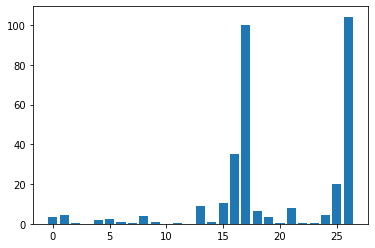

['Day_of_week', 'Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Light_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident', 'Accident_severity', 'Hour']


In [42]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
lst = []
for i in range(len(fs.scores_)):
    if fs.scores_[i]>1:
        print(encoded_data.columns[i],fs.scores_[i])
        lst.append(encoded_data.columns[i])
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
print(lst)

In [43]:
# upsampling using smote

print(len(X_train.columns))
print(X_train.shape,y_train.shape)

27
(8621, 27) (8621,)


In [44]:
counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 27) (21972,)


## G. Model Building & Evaluation

We will build 3 models: DecisionTree, RandomForest

* DecisionTree: Tree shaped diagram used to provide a action.
* RandomForest: Combination of multiple decision trees and provides result as the  majority of result of decision trees. ex: If result of majority trees is "A" , then random forest results in providing the result as "A"

In [45]:
from sklearn import metrics
def evaluations(model,xtest,ytest):
    
    model_predictions = model.predict(xtest)
     
    accuracy = accuracy_score(ytest,model_predictions)
    precision = metrics.precision_score(ytest,model_predictions,average= 'weighted')
    recall = metrics.recall_score(ytest,model_predictions,average= 'weighted')
    f1Score = metrics.f1_score(ytest,model_predictions,average= 'weighted')
    classificationReport = metrics.classification_report(ytest,model_predictions)
    
    confusionMatrix = confusion_matrix(ytest,model_predictions)
    
    return {'accuracy':accuracy,
           'precision':precision,
           'recall': recall,
           'f1score':f1Score,
           'Classification Report':classificationReport,
           'Confusion Matrix':confusionMatrix}
    


In [46]:
## DecisionTree
decisionTree = tree.DecisionTreeClassifier(random_state=0)
decisionTree.fit(X_train,y_train)
res = evaluations(decisionTree,X_test,y_test)


print("accuracy",res['accuracy'])
print('precision',res['precision'])
print('Recall',res['recall'])
print('F1_score',res['f1score'])
print('\n')
print("Confusion Matrix:\n",res['Confusion Matrix'])

print("\n\nClassification Report:\n",res['Classification Report'])

accuracy 0.687956698240866
precision 0.7588743646578603
Recall 0.687956698240866
F1_score 0.7177320129257747


Confusion Matrix:
 [[   2   12   38]
 [  18  208  326]
 [  92  667 2332]]


Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.04      0.02        52
           1       0.23      0.38      0.29       552
           2       0.86      0.75      0.81      3091

    accuracy                           0.69      3695
   macro avg       0.37      0.39      0.37      3695
weighted avg       0.76      0.69      0.72      3695



In [47]:
# Building Random Forest model 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_res = evaluations(rf,X_test,y_test)

print("accuracy",rf_res['accuracy'])
print('precision',rf_res['precision'])
print('Recall',rf_res['recall'])
print('F1_score',rf_res['f1score'])
print('\n')
print("Confusion Matrix:\n",rf_res['Confusion Matrix'])

print("\n\nClassification Report:\n",res['Classification Report'])

accuracy 0.7956698240866035
precision 0.7588761295019981
Recall 0.7956698240866035
F1_score 0.772463637376731


Confusion Matrix:
 [[   2    8   42]
 [   1   97  454]
 [   2  248 2841]]


Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.04      0.02        52
           1       0.23      0.38      0.29       552
           2       0.86      0.75      0.81      3091

    accuracy                           0.69      3695
   macro avg       0.37      0.39      0.37      3695
weighted avg       0.76      0.69      0.72      3695



In [48]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [49]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600]}
from sklearn.model_selection import ParameterGrid,KFold
param_size = ParameterGrid(parameters)
len(param_size)

6000

In [50]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [51]:

from sklearn.model_selection import GridSearchCV
tuning = KFold(n_splits=10,shuffle=True,random_state=42).split(X=X_train,y=y_train)

params = {
    'n_estimators':range(100,500,100),
    'max_depth': [5,11],
    'min_samples_split':[2,3],
}

rf_tuning = RandomForestClassifier()
rf_tuning = GridSearchCV(estimator=rf_tuning,param_grid=params,scoring='f1_weighted',n_jobs=-1,cv=tuning,
                         verbose=3)

rf_model = rf_tuning.fit(X=X_train,y=y_train)

print(rf_tuning.best_params_)
print(rf_tuning.best_score_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
{'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 200}
0.8718343742013435


In [52]:
### Model Generation

In [53]:
import joblib
joblib.dump(rf,'randomForest.joblib')

['randomForest.joblib']

In [54]:
## Trying to improve the performance


In [55]:
# Getting important features based on score of feature
rf.feature_importances_

array([0.05514546, 0.04977168, 0.0085851 , 0.02967077, 0.04293867,
       0.04723079, 0.01316126, 0.03425678, 0.04248168, 0.04411   ,
       0.01578956, 0.04106763, 0.02749942, 0.04490923, 0.01857498,
       0.03000113, 0.04838535, 0.05347735, 0.02751635, 0.01986995,
       0.02088731, 0.02747845, 0.01608472, 0.00974928, 0.05599146,
       0.07142029, 0.10394537])

In [56]:
rta_impFeatures = pd.DataFrame()
rta_impFeatures['Features'] = X_train.columns
rta_impFeatures['Importance'] = rf.feature_importances_
rta_impFeatures.sort_values("Importance",ascending=False)

,Features,Importance
26,Minutes,0.103945
25,Hour,0.071420
24,Cause_of_accident,0.055991
0,Day_of_week,0.055145
17,Number_of_casualties,0.053477
1,Age_band_of_driver,0.049772
16,Number_of_vehicles_involved,0.048385
5,Type_of_vehicle,0.047231
13,Light_conditions,0.044909
9,Lanes_or_Medians,0.044110


#### Observations:

* We can choose first 10/15 features

In [57]:
# selecting top 12 features

usefulFeatures = list(rta_impFeatures.sort_values("Importance", ascending=False)['Features'].head(12).values)
usefulFeatures

['Minutes',
 'Hour',
 'Cause_of_accident',
 'Day_of_week',
 'Number_of_casualties',
 'Age_band_of_driver',
 'Number_of_vehicles_involved',
 'Type_of_vehicle',
 'Light_conditions',
 'Lanes_or_Medians',
 'Driving_experience',
 'Area_accident_occured']

In [58]:
# Data
featureData = X[usefulFeatures]
featureData.shape

(12316, 12)

In [59]:
# Fitting and training again.

X_train2,X_test2,y_train2,y_test2 = train_test_split(featureData,y,test_size=0.2,random_state=42)


In [60]:
print(X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape)

(9852, 12) (2464, 12) (9852,) (2464,)


In [61]:
# Building Random Forest model 
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train2, y_train2)
# rf2_pred = rf.predict(X_test2)
rf2_res = evaluations(rf2,X_test2,y_test2)

print("accuracy",rf2_res['accuracy'])
print('precision',rf2_res['precision'])
print('Recall',rf2_res['recall'])
print('F1_score',rf2_res['f1score'])
print('\n')
print("Confusion Matrix:\n",rf_res['Confusion Matrix'])

print("\n\nClassification Report:\n",res['Classification Report'])

accuracy 0.8510551948051948
precision 0.8616367413882141
Recall 0.8510551948051948
F1_score 0.7957987912214175


Confusion Matrix:
 [[   2    8   42]
 [   1   97  454]
 [   2  248 2841]]


Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.04      0.02        52
           1       0.23      0.38      0.29       552
           2       0.86      0.75      0.81      3091

    accuracy                           0.69      3695
   macro avg       0.37      0.39      0.37      3695
weighted avg       0.76      0.69      0.72      3695



In [62]:
## An improvement has been found. Let us start with deployment, we can train it again and improve performance.

In [63]:
# Lets generate latest randomforest model

In [64]:
joblib.dump(rf2,'randomForest2.joblib')

['randomForest2.joblib']

In [65]:
# To ZIP all output Folders.
!zip -r file.zip /kaggle/working


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/cleanedData.csv (deflated 94%)
  adding: kaggle/working/__notebook_source__.ipynb (deflated 44%)
  adding: kaggle/working/randomForest.joblib (deflated 85%)
  adding: kaggle/working/randomForest2.joblib (deflated 86%)


In [66]:
!zip -r file.zip /kaggle/input/road-traffic-accidents

  adding: kaggle/input/road-traffic-accidents/ (stored 0%)
  adding: kaggle/input/road-traffic-accidents/RTA Dataset.csv (deflated 94%)
  adding: kaggle/input/road-traffic-accidents/cleaned.csv (deflated 95%)


In [67]:
# labelenc = LabelEncoder()
# labelenc.fit()
# joblib.dump(labelenc,'finalEncoding.joblib')


# Explainable AI 

In [68]:
# !pip install shap==0.39.0
import shap

In [69]:
# To use shap and for visualisations as js is needed for display, we intializae it as with js.
shap.initjs()

In [70]:
X_sample = X_train.sample(1000)

[CV 3/10] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.651 total time=   1.8s
[CV 7/10] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.653 total time=   1.9s
[CV 1/10] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.654 total time=   4.4s
[CV 5/10] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.642 total time=   4.9s
[CV 9/10] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.647 total time=   3.5s
[CV 3/10] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.657 total time=   5.0s
[CV 7/10] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.658 total time=   5.5s
[CV 2/10] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.652 total time=   7.4s
[CV 6/10] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.648 total time=   7.1s
[CV 10/10] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.673 total time=   6.8s
[CV 7/10] END max_d

# Explainable AI

In [71]:
import shap

In [72]:
shap.initjs()

In [82]:
# We will try to get the model1 features and their importances
print(len(rf.feature_importances_))

27


In [83]:
print(len(X_train.columns))

27


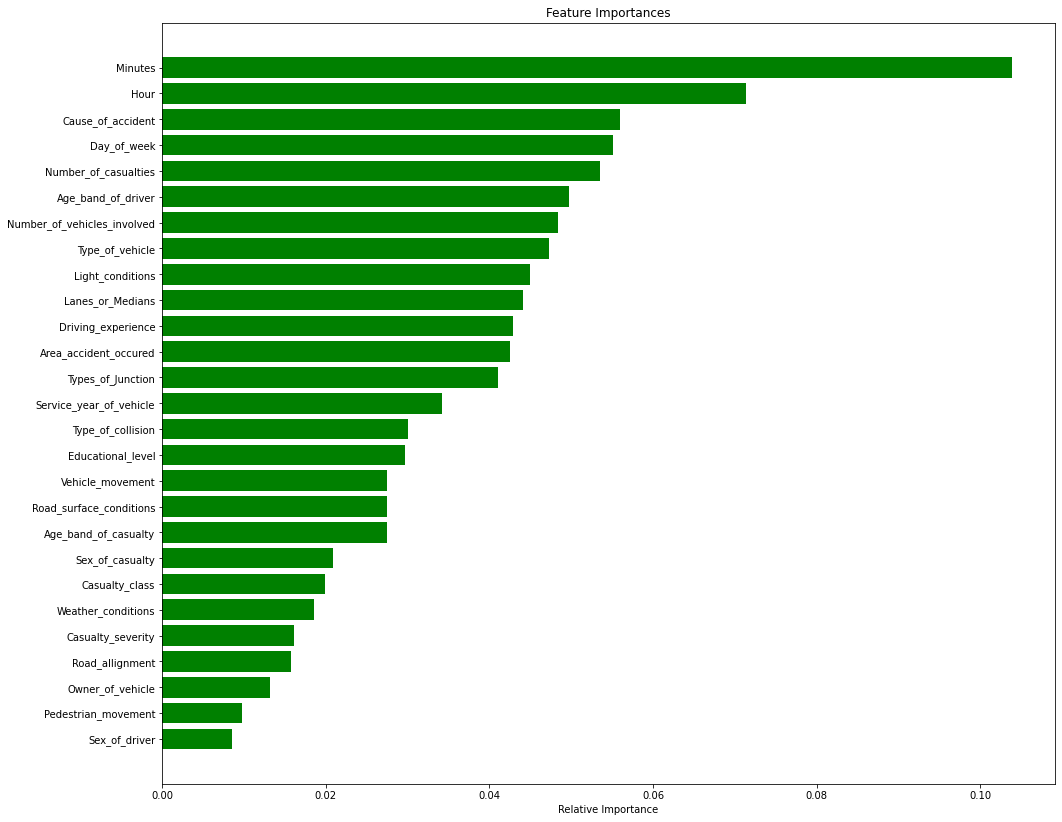

In [91]:
# Let us plot the importance and features

plt.figure(figsize=(16,14))
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [92]:
# We can observe feature "Minutes" is most important.
# Other few important features are "Hour","Cause of accident",'Day_of_week',
# 'Number_o_causalities','Age_band_ofdriver','Vehicles_involved',
# 'Type_ofvehicle','LightConditions','Driving experience','area accident occured'.

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


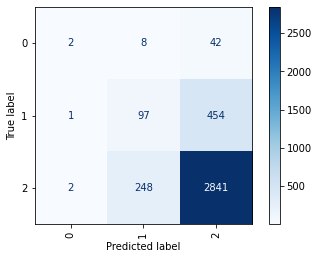

In [96]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix

class_names = [0,1,2]
disp = plot_confusion_matrix(rf, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

In [97]:
# 0 didnt get enough predictions, need to follow sampling techniques.

In [100]:
# computing shap values
explainer = shap.TreeExplainer(rf)
shape_values = explainer.shap_values(X)

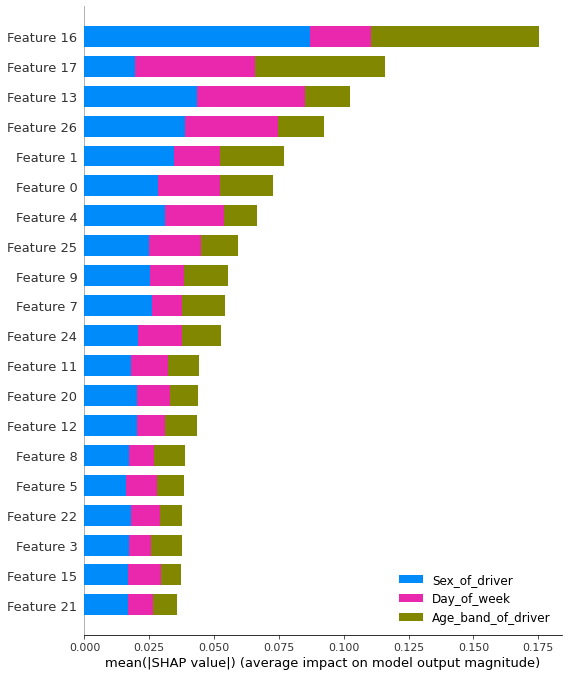

In [102]:
shap.summary_plot(shape_values,X.values,plot_type='bar',class_names=X_train.columns)

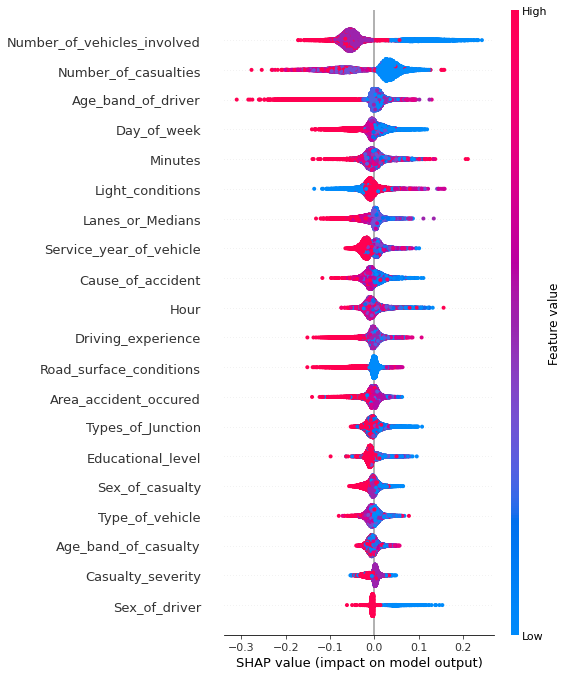

In [104]:
# Specific class 
shap.summary_plot(shape_values[1], X.values, feature_names = X_train.columns)

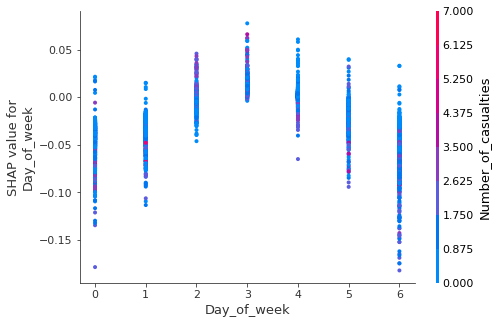

In [105]:
# Dependence Plot 
shap.dependence_plot(0, shape_values[0], X.values, feature_names=X_train.columns)

In [106]:
# ForcePLot 

shap.force_plot(explainer.expected_value[0], shape_values[0][2], X.values[2], feature_names = X_train.columns)

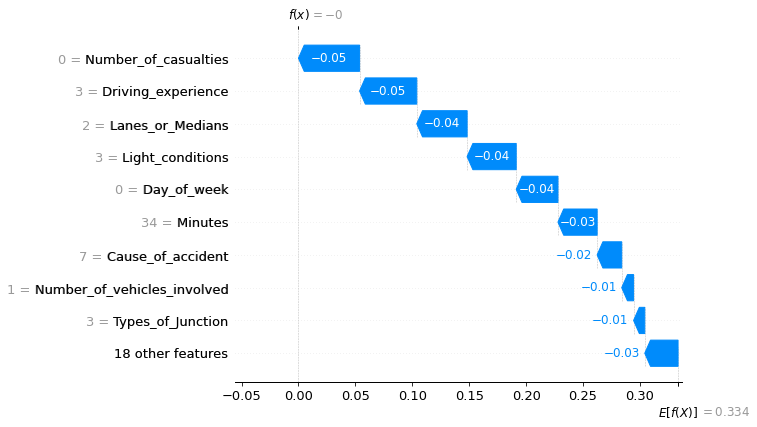

In [108]:
# Water Fa# 
row = 8 
shap.waterfall_plot(shap.Explanation(values=shape_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))